In [293]:
# First some imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [294]:
np.random.seed(1)

prespecified_covariance = np.array([[1, .8],
                                    [.8, 1]])

data = np.random.multivariate_normal(mean=[3, 7], cov=prespecified_covariance, size=30)

""" By default, when you slice out a single column (or row), numpy returns
an array of shape (some_number,) instead of (some_number, 1). However, for our
examples, we often actually want shape (some_number, 1) so essentially we want to 
"add" an extra axis. This is done by the np.newaxis command. Mess around with
it yourself to see how it works! """

X = data[:, 0, np.newaxis] # Here, we slice the first column (0) and immediately add a new axis!
y = data[:, 1, np.newaxis] # same here

print('The shape of X is: %s' % (X.shape,))
print('The shape of y is: %s' % (y.shape,))

The shape of X is: (30, 1)
The shape of y is: (30, 1)


In [295]:
n_obs = y.size
intercept = np.ones((n_obs, 1))  # creates intercept of shape (N, 1)

In [296]:
tuple_with_arrays = (intercept, X)
X_with_icept = np.hstack(tuple_with_arrays)

# Note: you could also simply do ...
# X_with_icept = np.hstack((np.ones((y.size, 1)), X))
# ... but arguably this is less 'readable' than the implementation above
print("Shape of X is now: %s" % (X_with_icept.shape,))

Shape of X is now: (30, 2)


In [297]:
print(X_with_icept)

[[1.         1.65246505]
 [1.         3.84037019]
 [1.         2.90681268]
 [1.         1.58544098]
 [1.         2.77619077]
 [1.         2.26439631]
 [1.         3.42732047]
 [1.         2.27222802]
 [1.         3.44118297]
 [1.         2.77565017]
 [1.         3.68214561]
 [1.         1.98577328]
 [1.         2.36158674]
 [1.         3.41250018]
 [1.         3.08642782]
 [1.         3.78163148]
 [1.         3.91918676]
 [1.         3.64080489]
 [1.         3.98584491]
 [1.         1.19071843]
 [1.         3.46268411]
 [1.         3.17361546]
 [1.         3.15323524]
 [1.         2.15472268]
 [1.         2.69083045]
 [1.         2.82662461]
 [1.         4.1943598 ]
 [1.         3.01266793]
 [1.         1.90963012]
 [1.         2.44916186]]


Now, let's take a look at the data. We'll create a scatter-plot for this (we'll leave out the intercept):

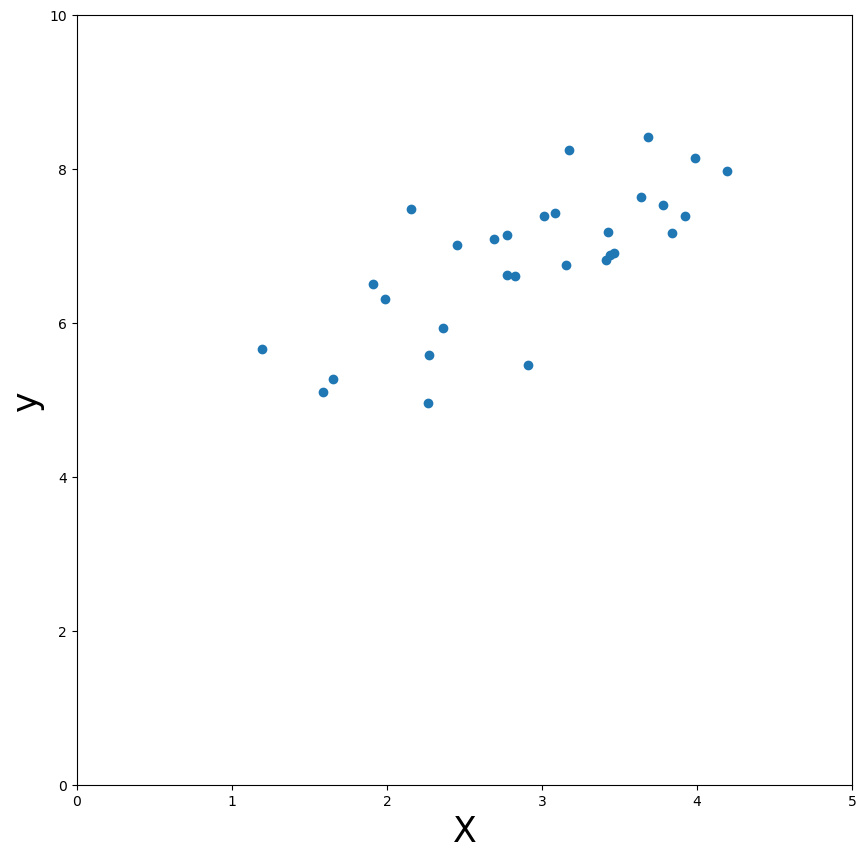

In [298]:
plt.figure(figsize=(10, 10))
plt.scatter(X_with_icept[:, 1], y)
plt.xlabel('X', fontsize=25)
plt.ylabel('y', fontsize=25)
plt.xlim((0, 5))
plt.ylim((0, 10))
plt.show()

In [299]:
this_y_hat_dot = this_X @ these_betas  # this_X.dot(these_betas) is also correct
print(this_y_hat_dot)

[ -0.01338524   1.6703706    2.21587559  10.21759739   6.73838803
  -8.73396662   3.42869211  -4.48842891   0.95290386   3.43650722
  -1.71391492   2.1629619    1.34852454  -2.22062007   3.99755808
   6.55005865  -3.79261597   2.34949198  -1.58847781  -1.00590812
   1.43788029   3.79819378  -4.96641193   0.84168045  -1.23324889
  -5.92010843   1.65225542  -2.18412034  -5.04079461   6.83379015
  -2.44856964  12.2700849   -5.58141723   9.15228886  -3.40630421
  -2.71636339  -4.49867819   2.09344214  -0.83014248   4.14900705
  -1.23808648   6.5956657    3.06043025   2.24424643   3.21012702
  -8.85509716  11.75506195   1.90635652  -1.03938628  -3.27900914
  -5.57655277   0.35407235   1.95194714   5.57227764   5.26441588
  -0.53012277  11.8957242   -0.46059776   5.79536197   2.4409444
  -5.42215061   6.39560171  -2.40432132   3.53601676   1.18398727
   6.910171    12.85646364  -1.58706604   4.27244301   7.18808465
   0.4676259    3.05310707 -11.94182401 -10.92527308   0.27265972
  -5.660524

In [300]:
from numpy.linalg import inv

est_betas = inv(X_with_icept.T @ X_with_icept) @ X_with_icept.T @ y

print("Shape of estimated betas: %s" % (est_betas.shape,))
print(est_betas)

Shape of estimated betas: (2, 1)
[[4.25897963]
 [0.88186203]]


In [301]:
y_hat = X_with_icept[:, 0] * est_betas[0] + X_with_icept[:, 1] * est_betas[1]
print('The predicted y-values are: \n\n%r' % y_hat)

The predicted y-values are: 

array([5.7162258 , 7.64565627, 6.82238735, 5.65711982, 6.70719685,
       6.25586475, 7.2814034 , 6.26277124, 7.29362822, 6.70672011,
       7.50612402, 6.01015768, 6.3415733 , 7.26833396, 6.98078313,
       7.59385684, 7.71516161, 7.46966721, 7.77394491, 5.30902899,
       7.31258926, 7.05767059, 7.03969805, 6.15914774, 6.63192082,
       6.75167254, 7.95782627, 6.91573708, 5.94300991, 6.41880247])


Now, let's plot the predicted $y$ values ($\hat{y}$) against the true $y$ values ($y$).

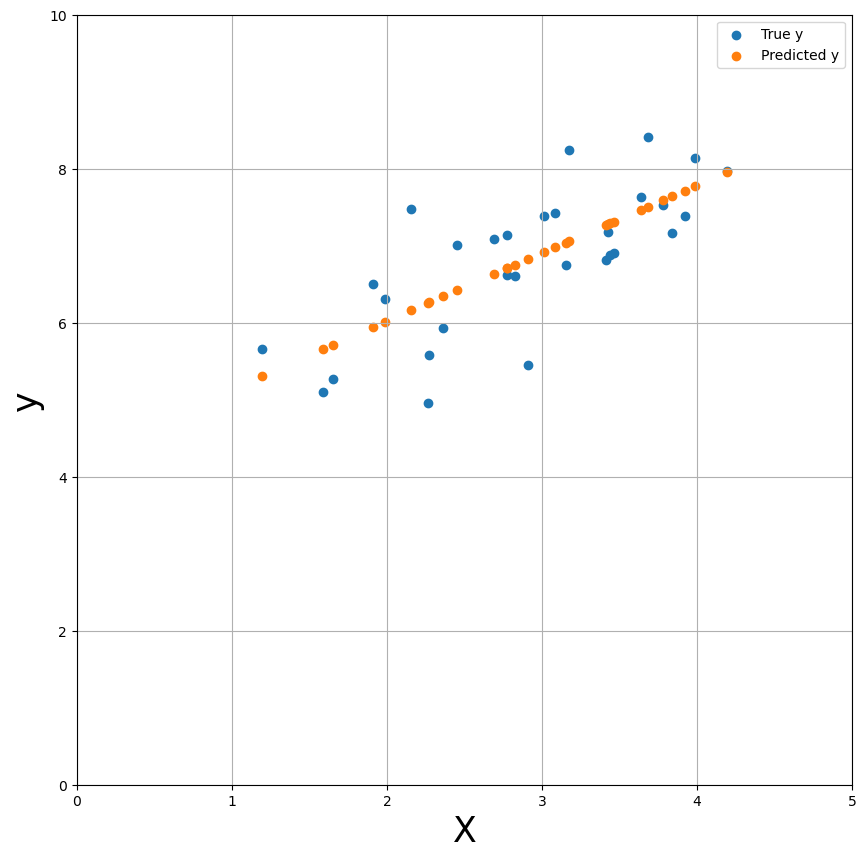

In [302]:
plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.xlabel('X', fontsize=25)
plt.ylabel('y', fontsize=25)
x_lim = (0, 5)
plt.xlim(x_lim)
plt.ylim((0, 10))
y_hat = X_with_icept @ est_betas # using the matrix algebra approach!
plt.scatter(X, y_hat, c='tab:orange')
plt.legend(['True y', 'Predicted y'])
plt.grid()
plt.show()

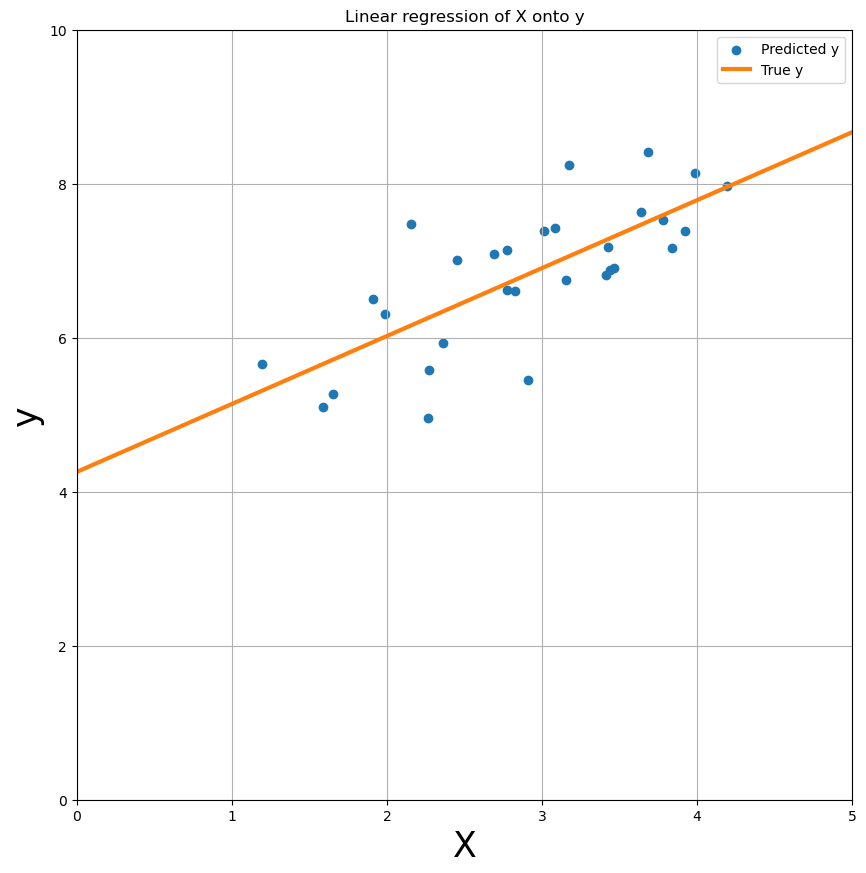

In [303]:
plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.xlabel('X', fontsize=25)
plt.ylabel('y', fontsize=25)
plt.xlim(x_lim)
plt.ylim((0, 10))
y_min_pred = est_betas[0] + est_betas[1] * x_lim[0]
y_max_pred = est_betas[0] + est_betas[1] * x_lim[1]
plt.plot(x_lim, [y_min_pred, y_max_pred], ls='-', c='tab:orange', lw=3)
plt.legend(['Predicted y', 'True y'])
plt.title('Linear regression of X onto y')
plt.grid()
plt.show()

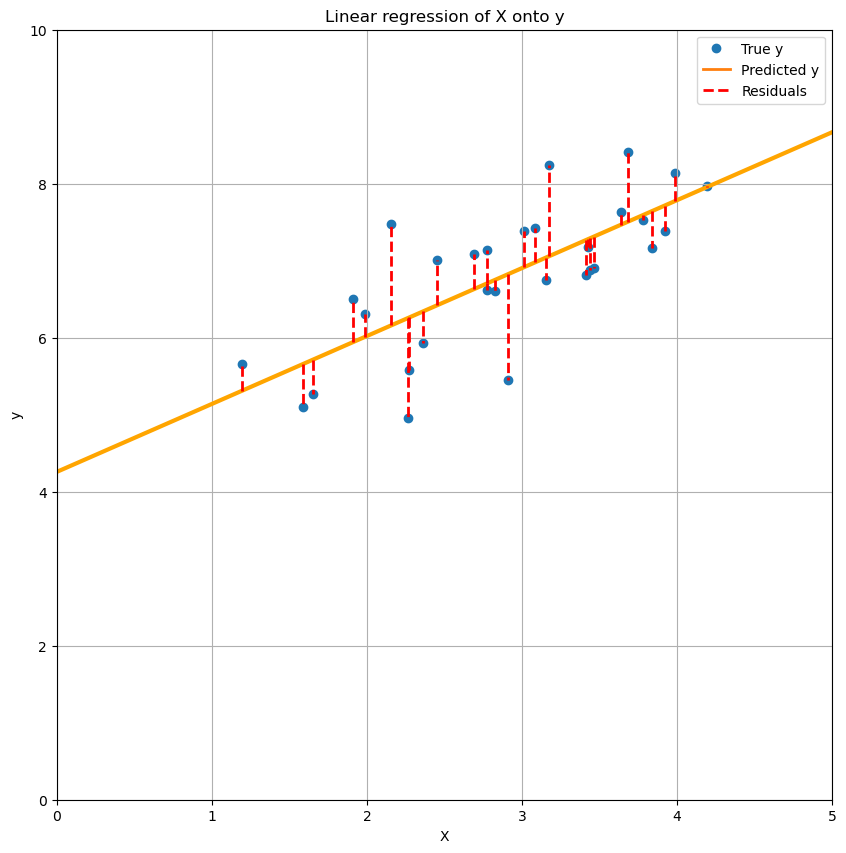

In [304]:
plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(x_lim)
plt.ylim((0, 10))
y_min_pred = est_betas[0] + est_betas[1] * x_lim[0]
y_max_pred = est_betas[0] + est_betas[1] * x_lim[1]
plt.plot(x_lim, [y_min_pred, y_max_pred], ls='-', c='orange', lw=3)
plt.title('Linear regression of X onto y')

for i in range(y.size):
    plt.plot((X[i], X[i]), (y_hat[i], y[i]), linestyle='--', c='red', lw=2)


from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color='tab:blue', marker='o', ls='None', lw=2),
    Line2D([0], [0], color='tab:orange', lw=2),
    Line2D([0], [0], color='r', ls='--', lw=2)
]

plt.legend(custom_lines, ['True y', 'Predicted y', 'Residuals'])
plt.grid()
plt.show()

In [305]:
numerator = np.sum((y - y_hat) ** 2)  # remember, y_hat equals X * beta
denominator = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - numerator / denominator

print('The R² value is: %.3f' % r_squared)

The R² value is: 0.549


/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_18827/1146833151.py:18: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot((X[i], X[i]), (y_hat_no_icept[i], y[i]), 'k-', linestyle='--', c='red', lw=2)
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_18827/1146833151.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot((X[i], X[i]), (y_hat_no_icept[i], y[i]), 'k-', linestyle='--', c='red', lw=2)


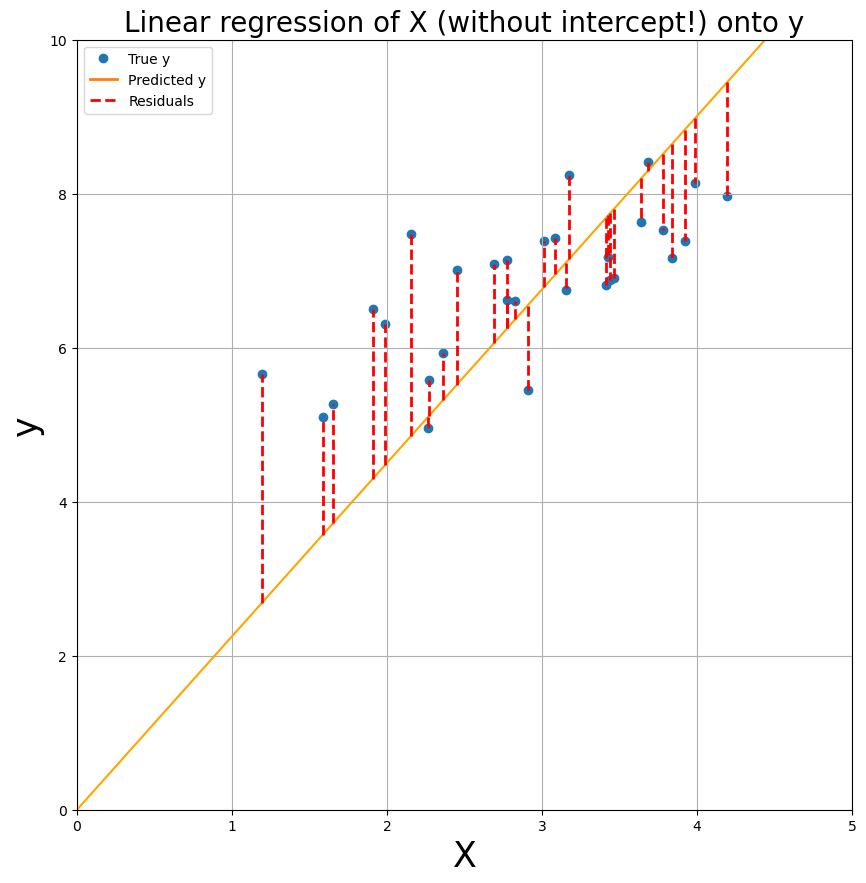

In [306]:
X_no_icept = X_with_icept[:, 1, np.newaxis]
beta_no_icept = inv(X_no_icept.T @ X_no_icept) @ X_no_icept.T @ y
y_hat_no_icept = beta_no_icept * X_no_icept

plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.xlabel('X', fontsize=25)
plt.ylabel('y', fontsize=25)
plt.xlim((0, 5))
plt.ylim((0, 10))
y_min_pred = beta_no_icept[0] * x_lim[0]
y_max_pred = beta_no_icept[0] * x_lim[1]
plt.plot(x_lim, [y_min_pred, y_max_pred], ls='-', c='orange')
plt.grid()
plt.title('Linear regression of X (without intercept!) onto y', fontsize=20)

for i in range(y.size):
    plt.plot((X[i], X[i]), (y_hat_no_icept[i], y[i]), 'k-', linestyle='--', c='red', lw=2)

plt.legend(custom_lines, ['True y', 'Predicted y', 'Residuals'])
plt.show()

## GLM in fMRI analyses
Univariate fMRI analyses basically use the same linear regression model as we've explained above to model the activation of voxels (with some minor additions) based on some design-matrix.

### The target
However, compared to "regular" data, one major difference is that *the dependent variable ($y$) in fMRI analyses is timeseries data*, which means that the observations of the dependent variable (activation of voxels) vary across time. 

How does such a time-series data look like? Let's look at a (simulated) time-series from a single voxel:

In [307]:
# import some stuff if you haven't done that already
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline

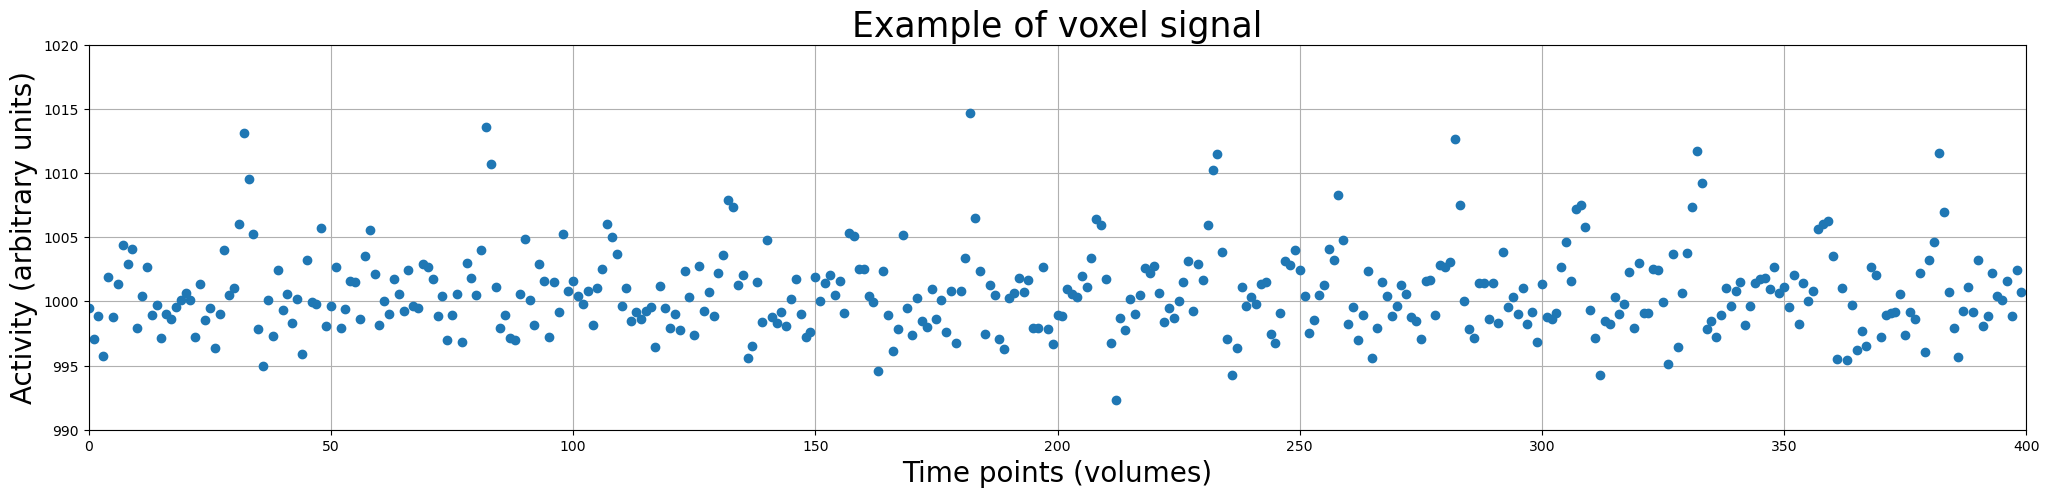

In [308]:
voxel_signal = np.load('example_voxel_signal.npy')
plt.figure(figsize=(25, 5))
plt.plot(voxel_signal, 'o')
plt.xlabel('Time points (volumes)', fontsize=20)
plt.ylabel('Activity (arbitrary units)', fontsize=20)
x_lim, y_lim = (0, 400), (990, 1020)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.title('Example of voxel signal', fontsize=25)
plt.grid()
plt.show()

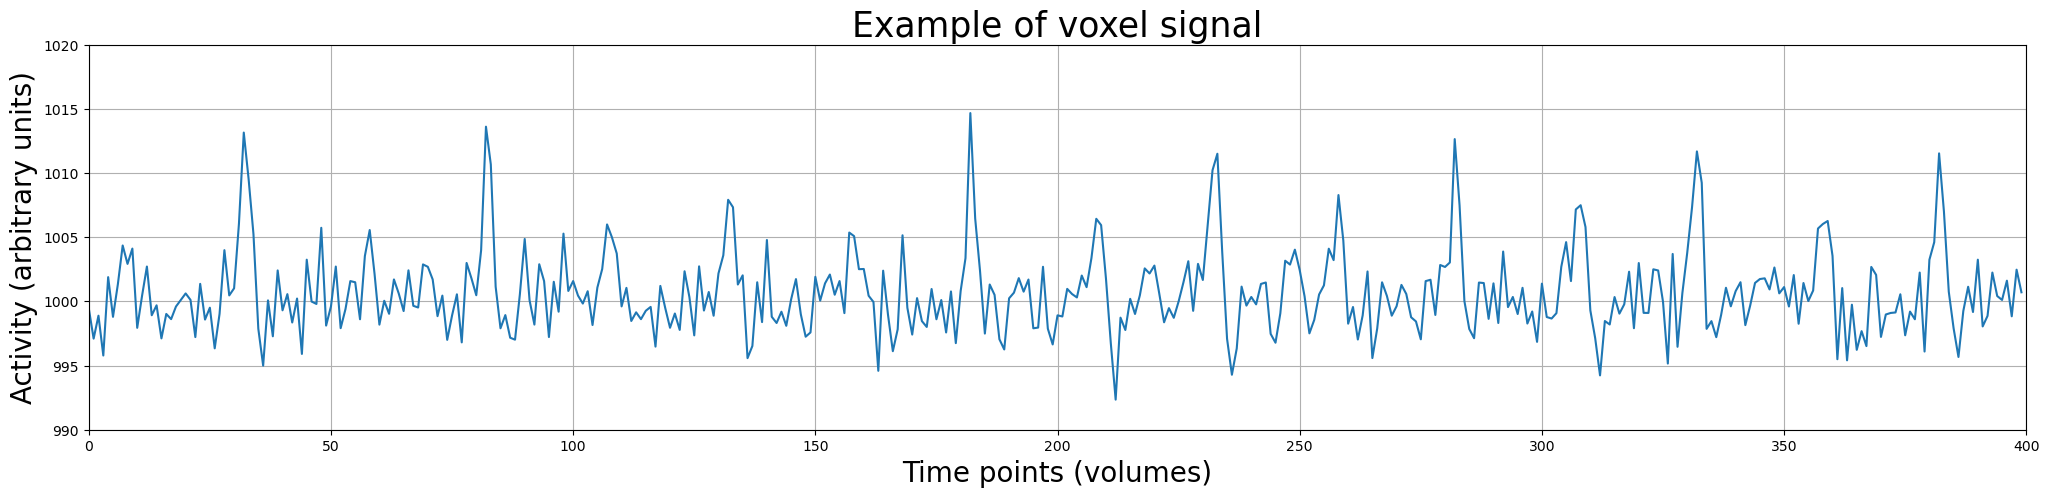

In [309]:
plt.figure(figsize=(25, 5))
plt.plot(voxel_signal)
plt.xlabel('Time points (volumes)', fontsize=20)
plt.ylabel('Activity (arbitrary units)', fontsize=20)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.title('Example of voxel signal', fontsize=25)
plt.grid()
plt.show()

Alright, this looks better. Now, let's look at our potential predictors ($X$).

In [310]:
onsets_squares = np.array([10, 110, 210, 310, 410, 510, 610, 710], dtype=int)
onsets_circles = np.array([60, 160,161,162,163,164,165, 260, 261,262,263,264,265, 360, 460, 560, 660, 760], dtype=int)

In [311]:
onsets_all = np.concatenate((onsets_squares, onsets_circles))
print(onsets_all)

[ 10 110 210 310 410 510 610 710  60 160 161 162 163 164 165 260 261 262
 263 264 265 360 460 560 660 760]


In [312]:
predictor_all = np.zeros(800)  # because the experiment lasted 800 seconds
predictor_all[onsets_all] = 1  # set the predictor at the indices to 1

print("Shape of predictor: %s" % (predictor_all.shape,))
print("\nContents of our predictor array:\n%r" % predictor_all.T)

Shape of predictor: (800,)

Contents of our predictor array:
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 

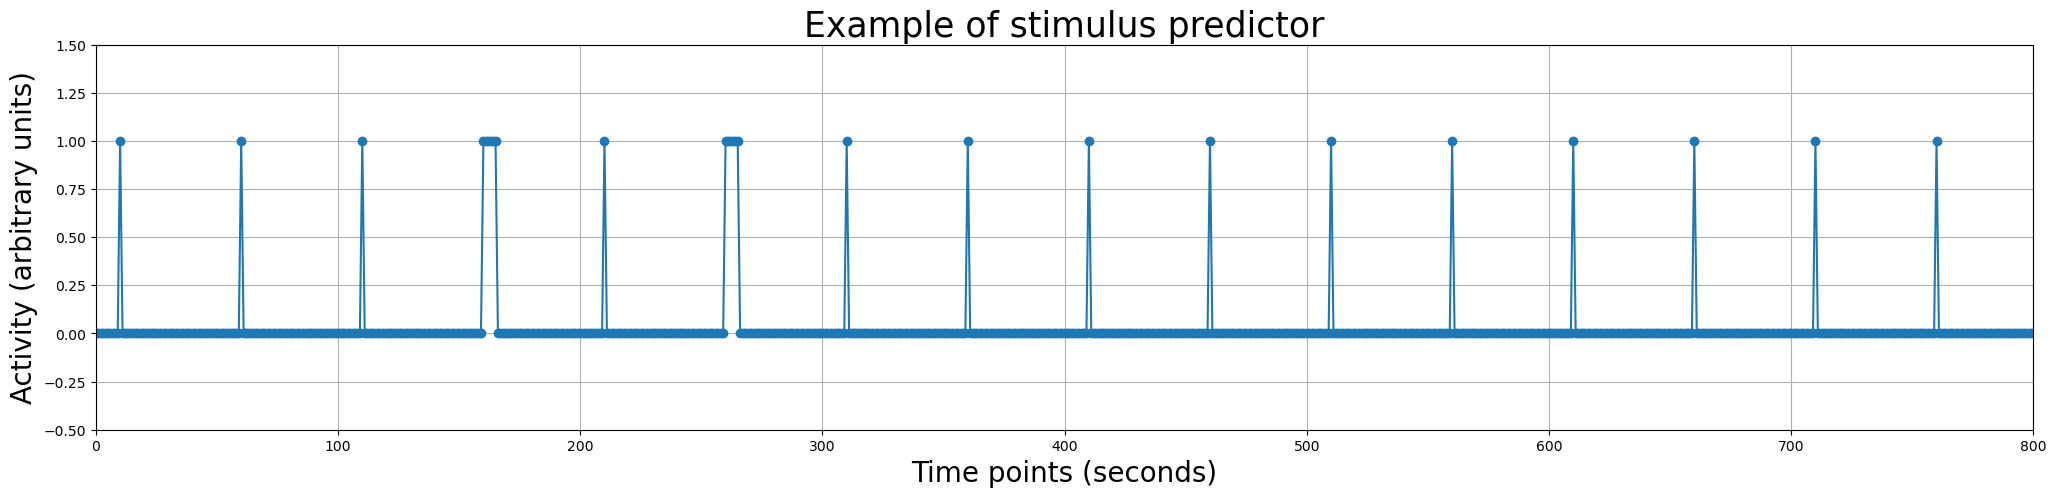

In [313]:
plt.figure(figsize=(25, 5))
plt.plot(predictor_all, marker='o')
plt.xlabel('Time points (seconds)', fontsize=20)
plt.ylabel('Activity (arbitrary units)', fontsize=20)
plt.xlim(0, 800)
plt.ylim(-.5, 1.5)
plt.title('Example of stimulus predictor', fontsize=25)
plt.grid()
plt.show()

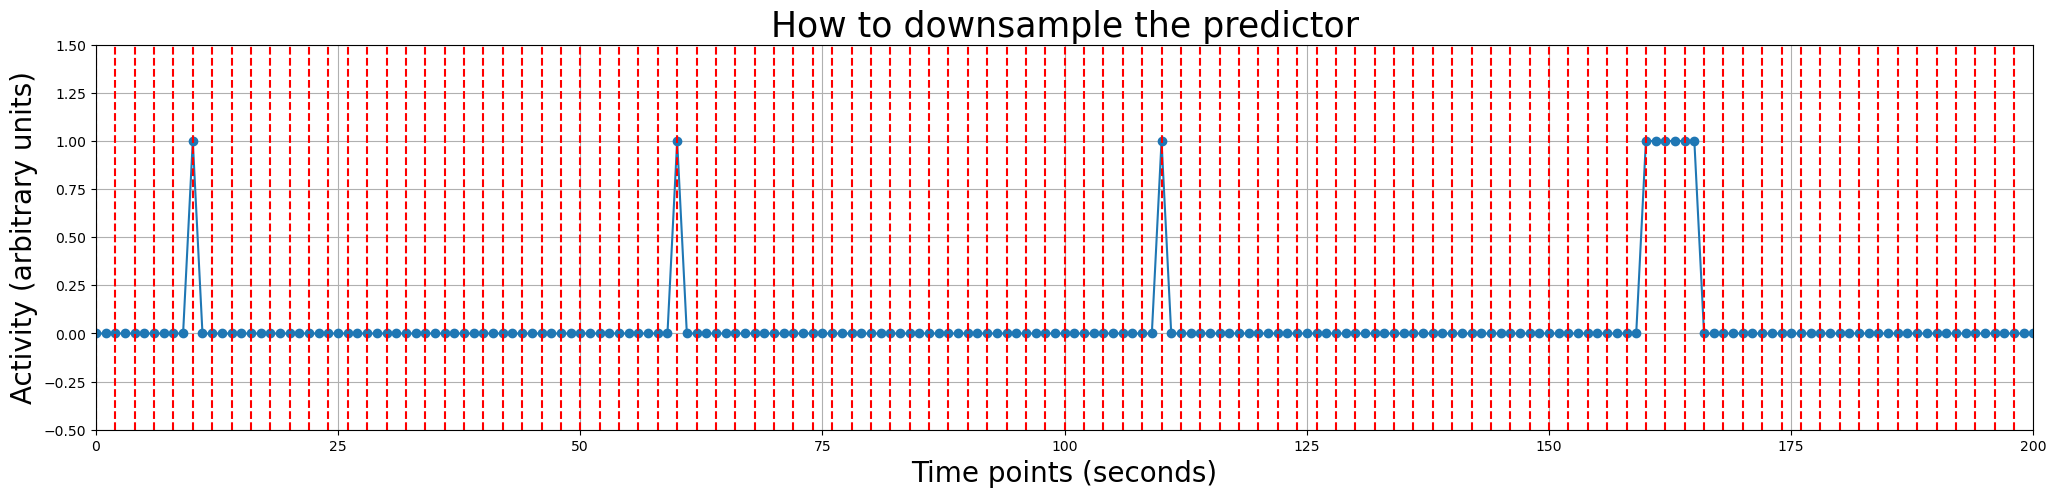

In [314]:
plt.figure(figsize=(25, 5))
plt.plot(predictor_all, marker='o')
plt.xlabel('Time points (seconds)', fontsize=20)
plt.ylabel('Activity (arbitrary units)', fontsize=20)
plt.xlim(0, 200)
plt.ylim(-.5, 1.5)
plt.title('How to downsample the predictor', fontsize=25)
plt.grid()

for t in np.arange(0, 200, 2):
    plt.axvline(t, ls='--', c='r')

plt.show()

In [315]:
from scipy.interpolate import interp1d
original_scale = np.arange(0, 800, 1)  # from 0 to 800 seconds
print("Original scale has %i datapoints (0-800, in seconds)" % original_scale.size)
resampler = interp1d(original_scale, predictor_all)

desired_scale = np.arange(0, 800, 2)
print("Desired scale has %i datapoints (0, 2, 4, ... 800, in volumes)" % desired_scale.size)
predictor_all_ds = resampler(desired_scale)

print("Downsampled predictor has %i datapoints (in volumes)" % predictor_all_ds.size)

Original scale has 800 datapoints (0-800, in seconds)
Desired scale has 400 datapoints (0, 2, 4, ... 800, in volumes)
Downsampled predictor has 400 datapoints (in volumes)


In [316]:
print(predictor_all_ds)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

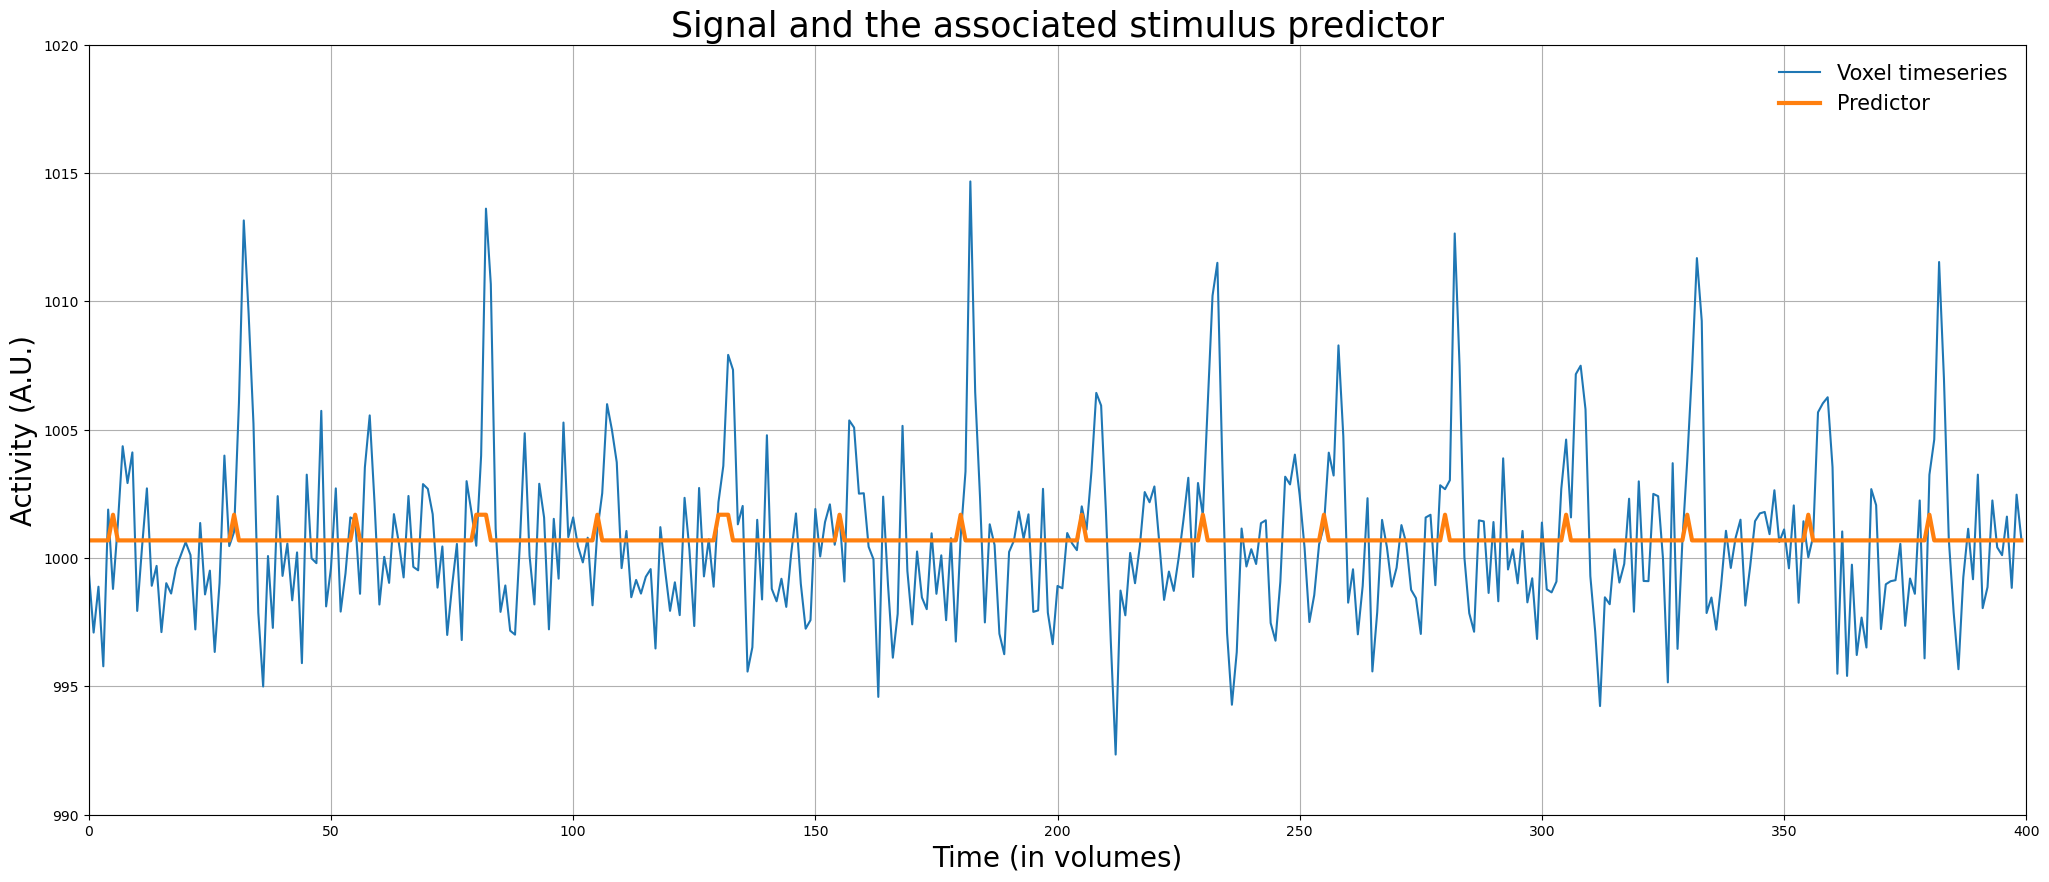

In [317]:
plt.figure(figsize=(25, 10))
plt.plot(voxel_signal)
plt.plot(predictor_all_ds + voxel_signal.mean(), lw=3)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.xlabel('Time (in volumes)', fontsize=20)
plt.ylabel('Activity (A.U.)', fontsize=20)
plt.legend(['Voxel timeseries', 'Predictor'], fontsize=15, loc='upper right', frameon=False)
plt.title("Signal and the associated stimulus predictor", fontsize=25)
plt.grid()
plt.show()

In [318]:
from nilearn.glm.first_level.hemodynamic_models import glover_hrf

In [319]:
TR = 2
osf = 2
length_hrf = 32  # sec

canonical_hrf = glover_hrf(tr=TR, oversampling=osf, time_length=length_hrf, onset=0)
canonical_hrf /= canonical_hrf.max()
print("Size of canonical hrf variable: %i" % canonical_hrf.size)

Size of canonical hrf variable: 32


As you can see, the length of the `canonical_hrf` variable is 32 (seconds). Now, let's plot it:

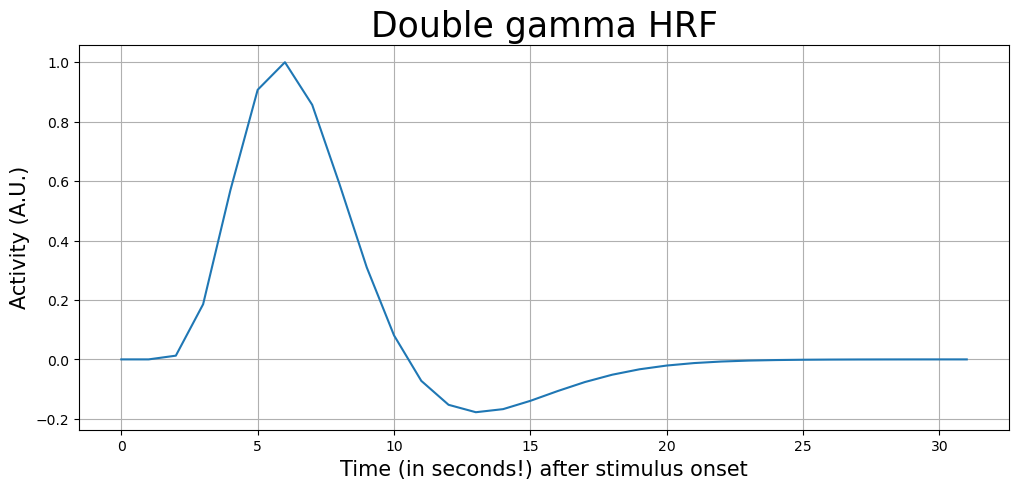

In [320]:
t = np.arange(0, canonical_hrf.size)

plt.figure(figsize=(12, 5))
plt.plot(t, canonical_hrf)
plt.xlabel('Time (in seconds!) after stimulus onset', fontsize=15)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.title('Double gamma HRF', fontsize=25)
plt.grid()
plt.show()

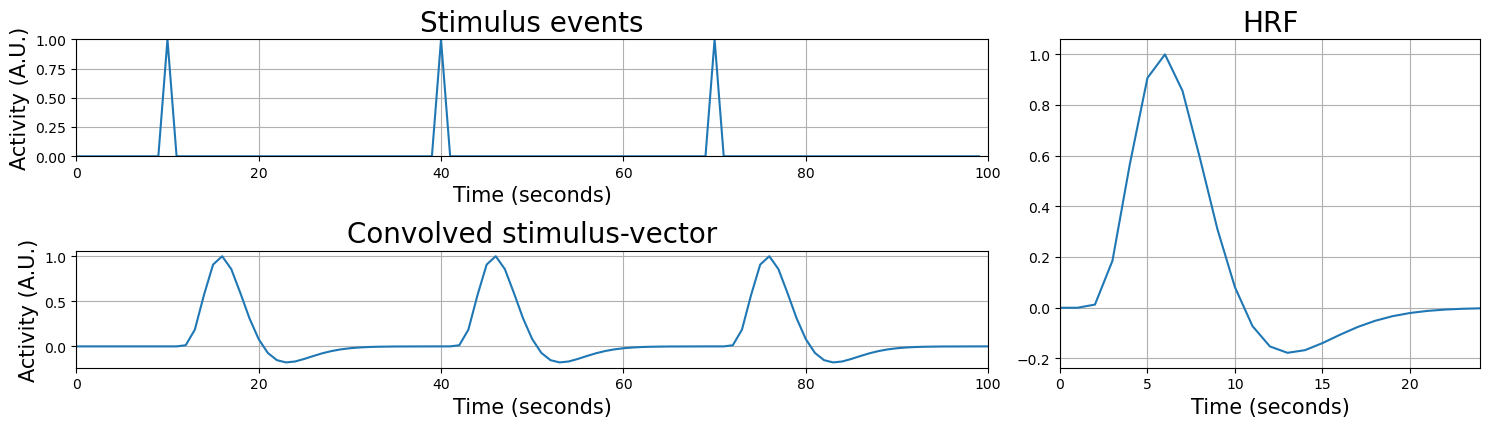

In [321]:
random_stimulus_onsets = [10, 40, 70]
random_stim_vector = np.zeros(100)
random_stim_vector[random_stimulus_onsets] = 1

plt.figure(figsize=(15, 6))
plt.subplot2grid((3, 3), (0, 0), colspan=2)
plt.plot(random_stim_vector)
plt.xlim((0, 100))
plt.ylim((0, 1))
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.xlabel('Time (seconds)', fontsize=15)
plt.title('Stimulus events', fontsize=20)
plt.grid()

plt.subplot2grid((3, 3), (0, 2), rowspan=2)
plt.plot(canonical_hrf)
plt.title('HRF', fontsize=20)
plt.xlim(0, 24)
plt.xlabel("Time (seconds)", fontsize=15)
plt.grid()

convolved_stim_vector = np.convolve(random_stim_vector, canonical_hrf, 'full')
plt.subplot2grid((3, 3), (1, 0), colspan=2)
plt.plot(convolved_stim_vector)
plt.title('Convolved stimulus-vector', fontsize=20)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.xlabel('Time (seconds)', fontsize=15)
plt.xlim(0, 100)
plt.tight_layout()
plt.grid()
plt.show()

The shape of the convolved predictor after convolution: (831,)
After trimming, the shape is: (800,)
Shape after adding the new axis: (800, 1)


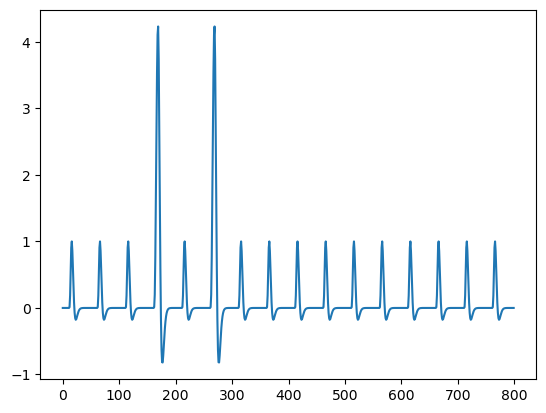

In [322]:
'''We need to "squeeze" out the extra singleton axis, because that's
what the np.convolve function expects, i.e., arrays of shape (N,) and NOT (N, 1)
To go from (N, 1) --> (N,) we'll use the squeeze() method'''
predictor_conv = np.convolve(predictor_all.squeeze(), canonical_hrf)

print("The shape of the convolved predictor after convolution: %s" % (predictor_conv.shape,))

# After convolution, we also neem to "trim" off some excess values from
# the convolved signal (the reason for this is not important to understand)
predictor_conv = predictor_conv[:predictor_all.size]

print("After trimming, the shape is: %s" % (predictor_conv.shape,))

# And we have to add a new axis again to go from shape (N,) to (N, 1),
# which is important for stacking the intercept, later
predictor_conv = predictor_conv[:, np.newaxis]

print("Shape after adding the new axis: %s" % (predictor_conv.shape,))
plt.plot(predictor_conv)

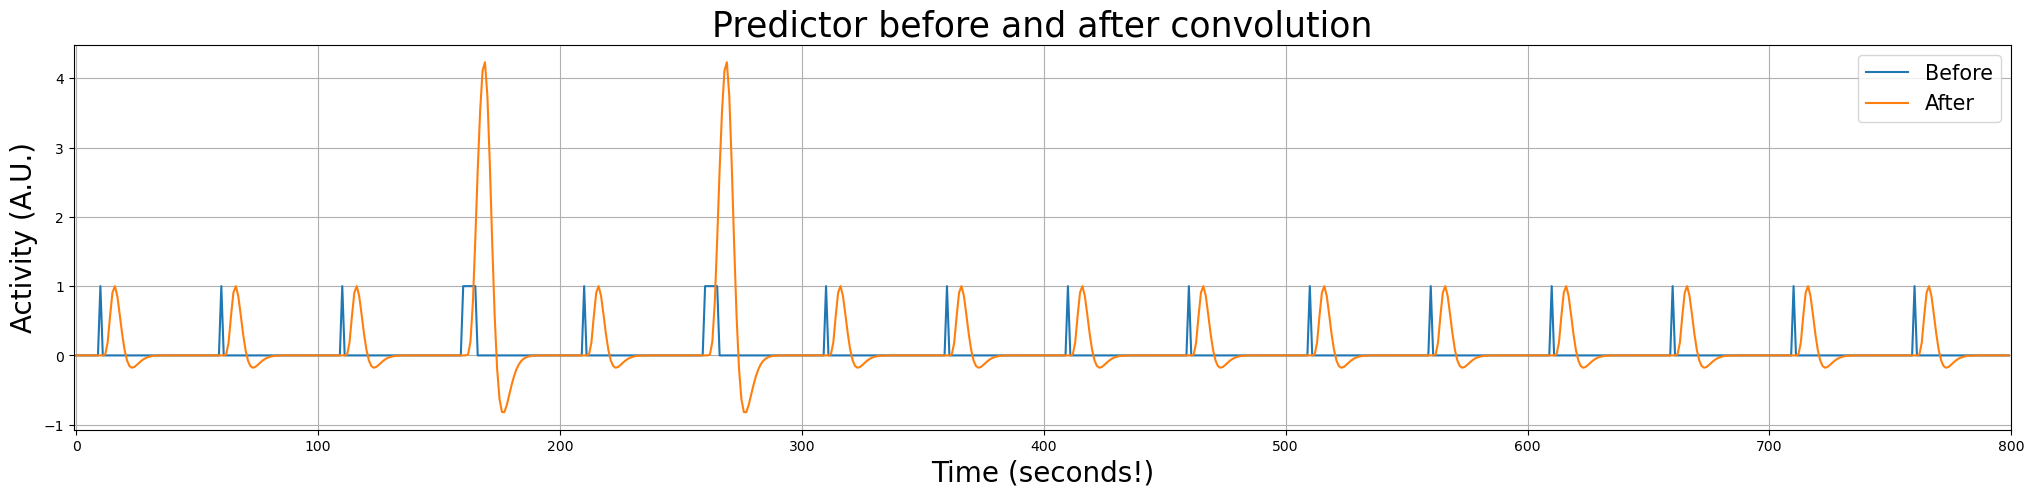

In [323]:
plt.figure(figsize=(25, 5))
plt.plot(predictor_all)
plt.plot(predictor_conv)
plt.xlim(-1, 800)
plt.title("Predictor before and after convolution", fontsize=25)
plt.xlabel("Time (seconds!)", fontsize=20)
plt.ylabel("Activity (A.U.)", fontsize=20)
plt.legend(['Before', 'After'], loc='upper right', fontsize=15)
plt.grid()
plt.show()

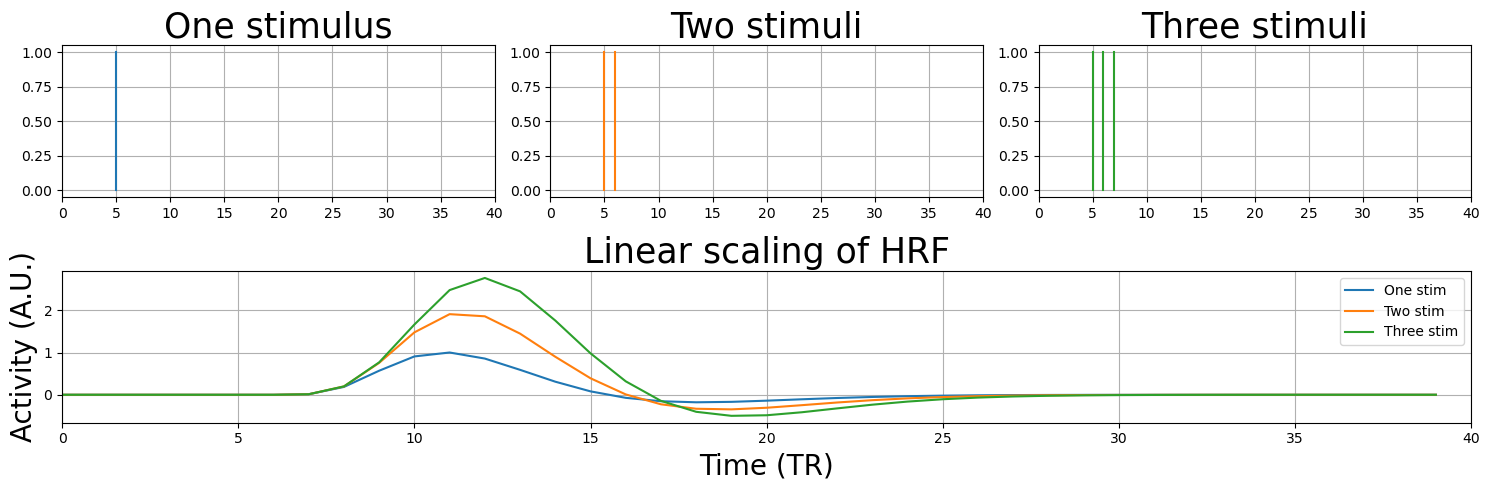

In [324]:
plt.figure(figsize=(15, 5))

N = 40
one_stim = np.zeros(N)
one_stim[5] = 1
one_stim_conv = np.convolve(one_stim, canonical_hrf)[:N]
two_stim = np.zeros(N)
two_stim[[5, 6]] = 1
two_stim_conv = np.convolve(two_stim, canonical_hrf)[:N]
three_stim = np.zeros(N)
three_stim[[5, 6, 7]] = 1
three_stim_conv = np.convolve(three_stim, canonical_hrf)[:N]

plt.subplot2grid((2, 3), (0, 0))
for ons in np.where(one_stim)[0]:
    plt.plot([ons, ons], [0, 1])

plt.xlim(0, N)
plt.title("One stimulus", fontsize=25)
plt.grid()

plt.subplot2grid((2, 3), (0, 1))
for ons in np.where(two_stim)[0]:
    plt.plot([ons, ons], [0, 1], c='tab:orange')

plt.xlim(0, N)
plt.title("Two stimuli", fontsize=25)
plt.grid()

plt.subplot2grid((2, 3), (0, 2))
for ons in np.where(three_stim)[0]:
    plt.plot([ons, ons], [0, 1], c='tab:green')

plt.xlim(0, N)    
plt.title("Three stimuli", fontsize=25)
plt.grid()

plt.subplot2grid((2, 3), (1, 0), colspan=3)
plt.plot(one_stim_conv)
plt.plot(two_stim_conv)
plt.plot(three_stim_conv)
plt.legend(['One stim', 'Two stim', 'Three stim'])
plt.title('Linear scaling of HRF', fontsize=25)
plt.ylabel('Activity (A.U.)', fontsize=20)
plt.xlabel('Time (TR)', fontsize=20)
plt.xlim(0, N)
plt.grid()
plt.tight_layout()
plt.show()

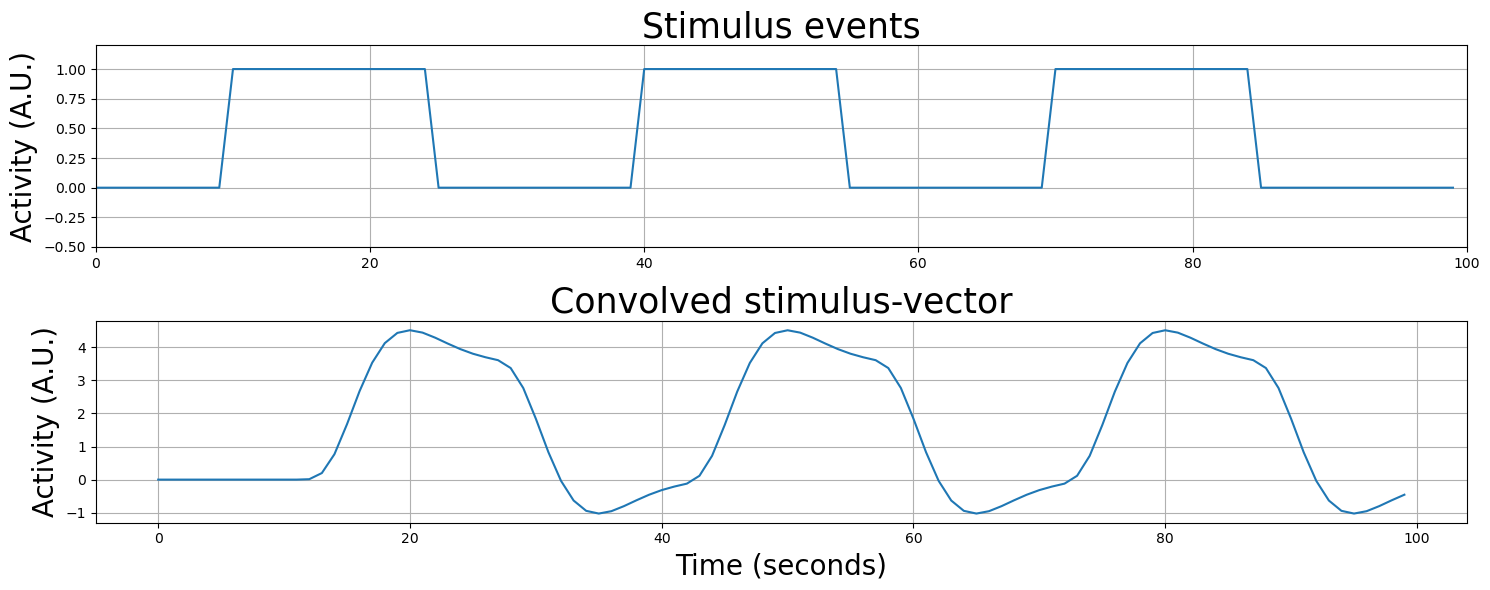

In [325]:
random_stimulus_onsets2 = list(range(10, 25)) + list(range(40, 55)) + list(range(70, 85))
random_stim_vector2 = np.zeros(100)

random_stim_vector2[random_stimulus_onsets2] = 1

plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.grid()
plt.plot(random_stim_vector2, c='tab:blue')

plt.xlim((0, 100))
plt.ylim((-.5, 1.2))
plt.ylabel('Activity (A.U.)', fontsize=20)

plt.title('Stimulus events', fontsize=25)

convolved_stim_vector2 = np.convolve(random_stim_vector2, canonical_hrf)[:random_stim_vector2.size]
plt.subplot(2, 1, 2)
plt.plot(convolved_stim_vector2)
plt.title('Convolved stimulus-vector', fontsize=25)
plt.ylabel('Activity (A.U.)', fontsize=20)
plt.xlabel('Time (seconds)', fontsize=20)
plt.grid()
plt.tight_layout()
plt.show()

/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_18827/2851934812.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot((i, i), (0, 1), 'k-', c='tab:blue')


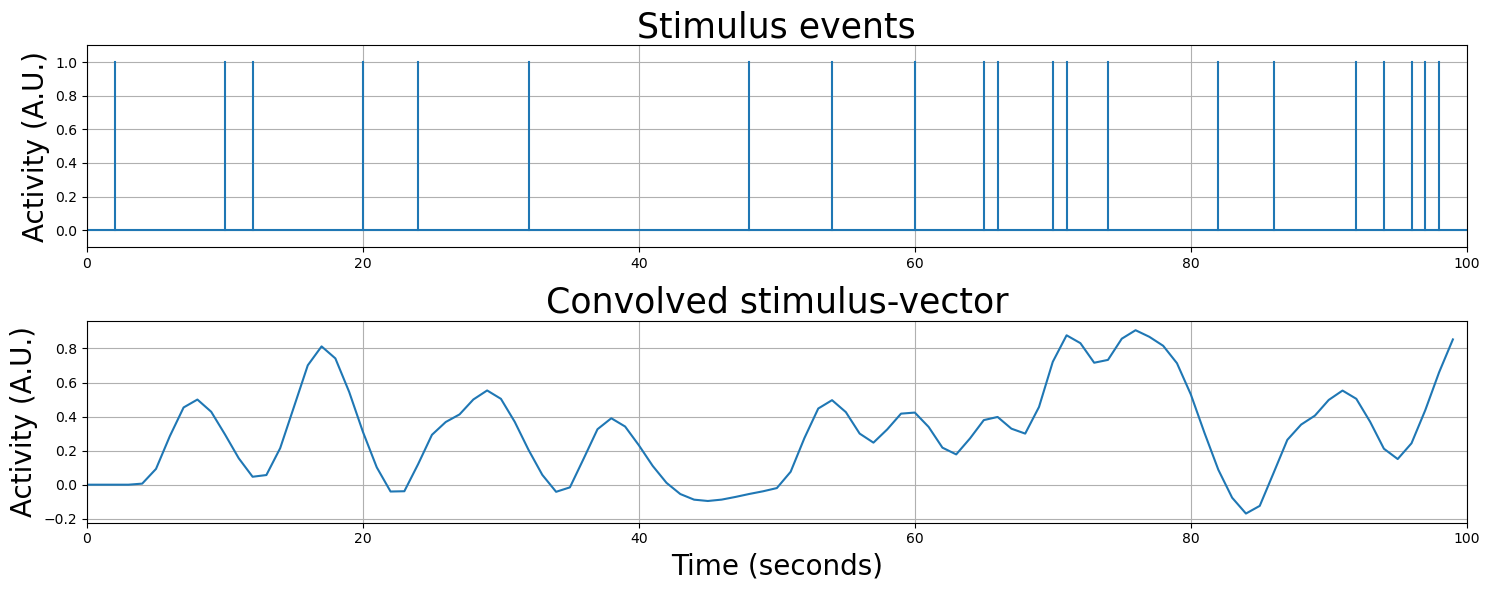

In [326]:
random_stimulus_onsets3 = np.random.randint(0, 100, 25)
random_stim_vector3 = np.zeros(100)
random_stim_vector3[random_stimulus_onsets3] = 1

plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)

plt.axhline(0)
for i, event in enumerate(random_stim_vector3):
    if event != 0.0:
        plt.plot((i, i), (0, 1), 'k-', c='tab:blue')

plt.xlim((0, 100))
plt.ylim((-0.1, 1.1))
plt.ylabel('Activity (A.U.)', fontsize=20)
plt.title('Stimulus events', fontsize=25)
plt.grid()

convolved_stim_vector3 = np.convolve(random_stim_vector3 * .5, canonical_hrf, 'full')[:random_stim_vector3.size]
plt.subplot(2, 1, 2)
plt.plot(convolved_stim_vector3)
plt.xlim(0, 100)
plt.title('Convolved stimulus-vector', fontsize=25)
plt.ylabel('Activity (A.U.)', fontsize=20)
plt.xlabel('Time (seconds)', fontsize=20)
plt.grid()

plt.tight_layout()
plt.show()

In [327]:
print("Size convolved predictor: %i" % predictor_conv.size)
print("Size voxel signal: %i" % voxel_signal.size)

Size convolved predictor: 800
Size voxel signal: 400


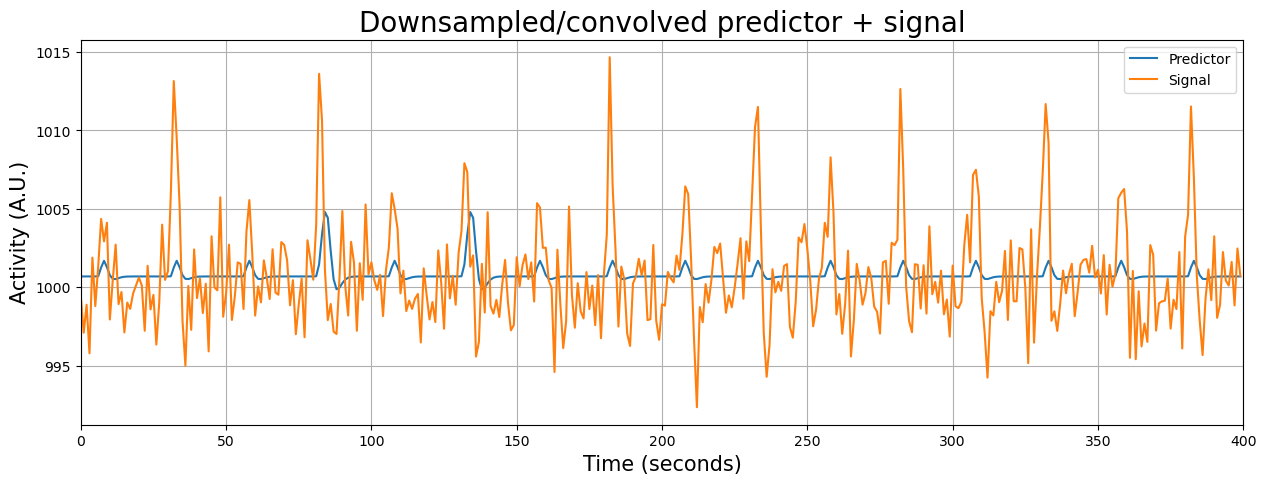

In [328]:
original_scale = np.arange(0, 800)
resampler = interp1d(original_scale, np.squeeze(predictor_conv))

desired_scale = np.arange(0, 800, 2)
predictor_conv_ds = resampler(desired_scale)

plt.figure(figsize=(15, 5))
plt.plot(predictor_conv_ds + voxel_signal.mean())
plt.plot(voxel_signal)
plt.grid()
plt.title('Downsampled/convolved predictor + signal', fontsize=20)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.xlabel('Time (seconds)', fontsize=15)
plt.legend(['Predictor', 'Signal'])
plt.xlim(x_lim)
plt.show()

In [329]:
if predictor_all_ds.ndim == 1:  # do not remove this! This adds a singleton dimension, such that you can call np.hstack on it
    predictor_all_ds = predictor_all_ds[:, np.newaxis]

icept = np.ones((predictor_all_ds.size, 1))
X_simple = np.hstack((icept, predictor_all_ds))

In [330]:
onsets2 = np.array([3.62, 16.26, 34.12, 42.98])  # in seconds
duration = 50  # duration experiment in seconds
osf = 100  # osf = OverSampling Factor

pred2 = np.zeros(duration * osf)
print("Size of oversampled (factor: 1000) predictor: %i" % pred2.size)

onsets2_in_msec = (onsets2 * osf).astype(int)  # we convert it to int, because floats (even when it's 5.0) cannot be used as indices
pred2[onsets2_in_msec] = 1

Size of oversampled (factor: 1000) predictor: 5000


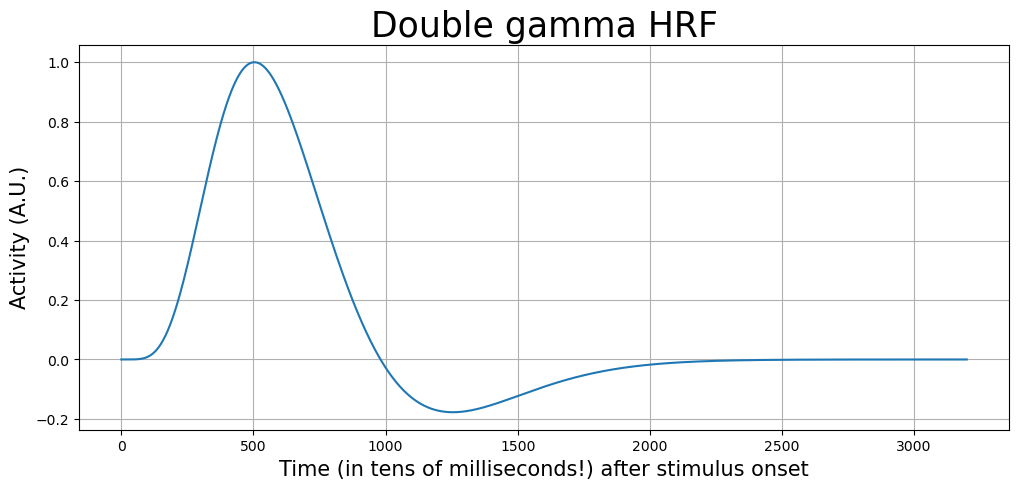

In [331]:
osf = 100 * TR
hrf_ms = glover_hrf(tr=TR, oversampling=osf, time_length=32)
hrf_ms /= hrf_ms.max()  # scale such that max = 1

t = np.arange(0, hrf_ms.size)

plt.figure(figsize=(12, 5))
plt.plot(t, hrf_ms)
plt.xlabel('Time (in tens of milliseconds!) after stimulus onset', fontsize=15)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.title('Double gamma HRF', fontsize=25)
plt.grid()
plt.show()

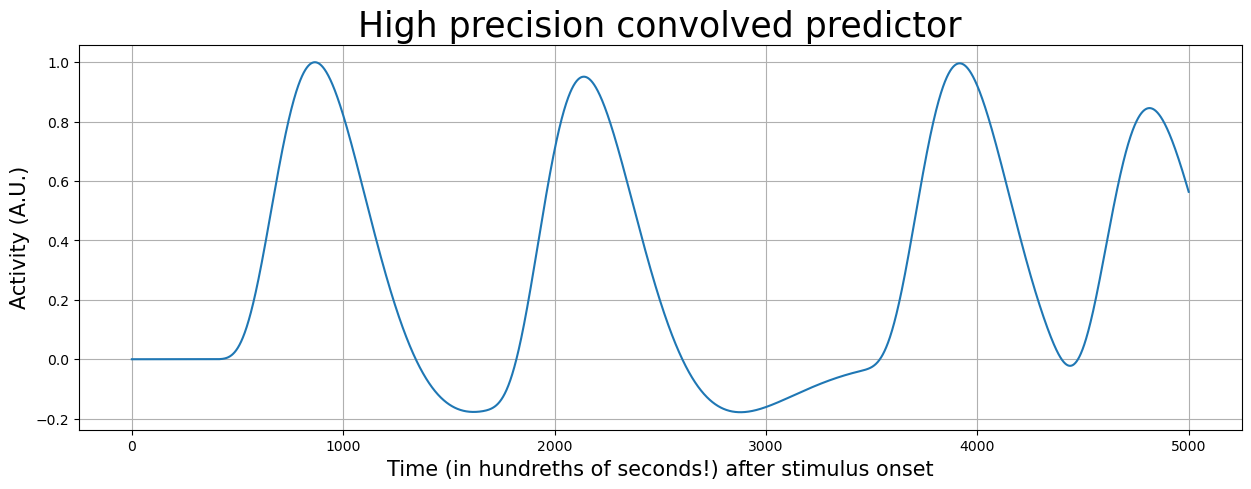

In [332]:
pred2_conv = np.convolve(pred2, hrf_ms)[:pred2.size]

plt.figure(figsize=(15, 5))
plt.plot(pred2_conv)
plt.xlabel('Time (in hundreths of seconds!) after stimulus onset', fontsize=15)
plt.ylabel('Activity (A.U.)', fontsize=15)
plt.title('High precision convolved predictor', fontsize=25)
plt.grid()
plt.show()

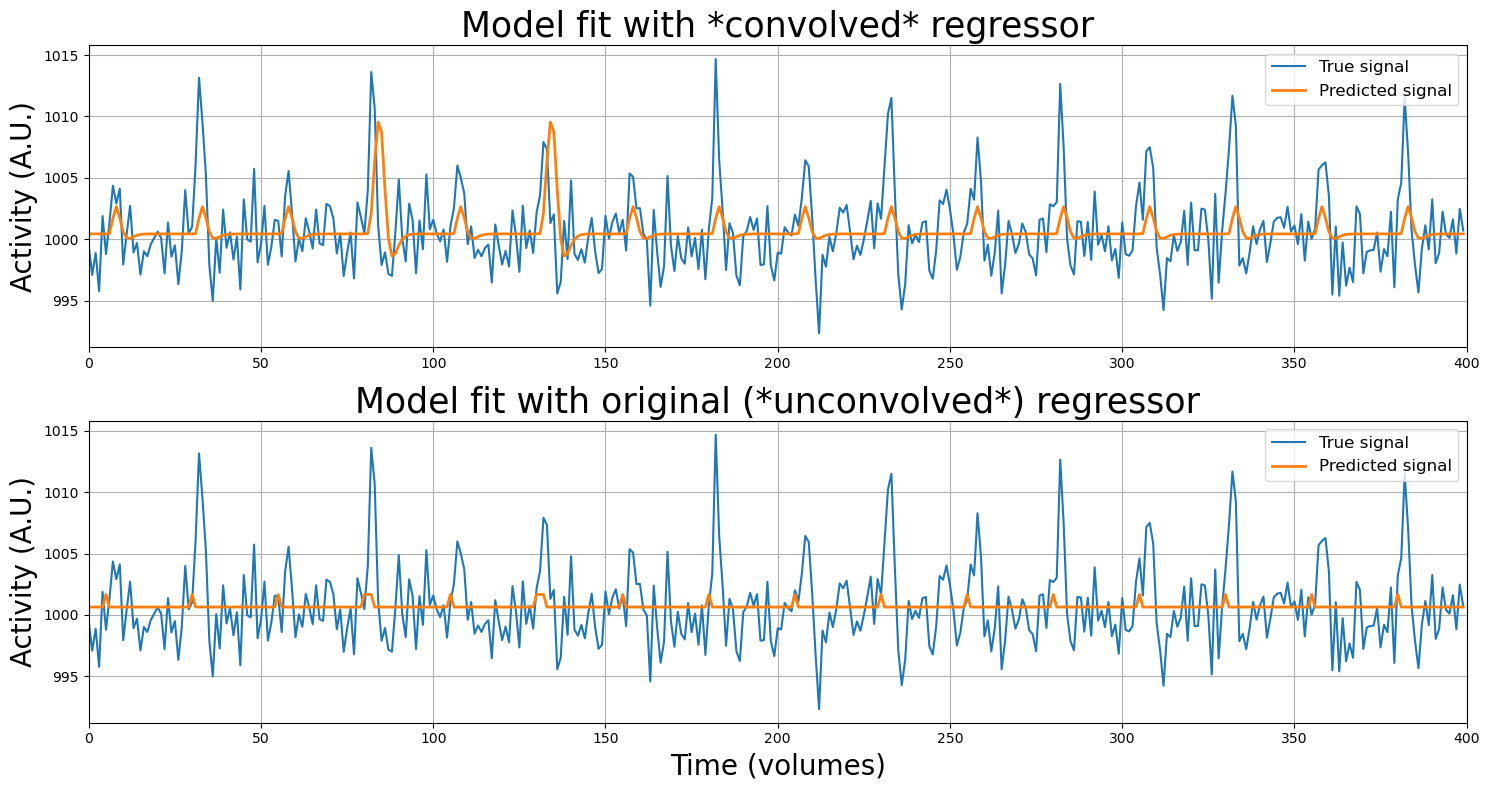

In [333]:
if predictor_conv_ds.ndim == 1:
    # Add back a singleton axis (which was removed before downsampling)
    # otherwise stacking will give an error
    predictor_conv_ds = predictor_conv_ds[:, np.newaxis]

intercept = np.ones((predictor_conv_ds.size, 1))
X_conv = np.hstack((intercept, predictor_conv_ds))
betas_conv = inv(X_conv.T @ X_conv) @ X_conv.T @ voxel_signal

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(voxel_signal)
plt.plot(X_conv @ betas_conv, lw=2)
plt.xlim(x_lim)
plt.ylabel("Activity (A.U.)", fontsize=20)
plt.title("Model fit with *convolved* regressor", fontsize=25)
plt.legend(['True signal', 'Predicted signal'], fontsize=12, loc='upper right')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(voxel_signal)
betas_simple = np.array([1000.64701684, 1.02307437])
plt.plot(X_simple @ betas_simple, lw=2)
plt.xlim(x_lim)
plt.ylabel("Activity (A.U.)", fontsize=20)
plt.title("Model fit with original (*unconvolved*) regressor", fontsize=25)
plt.legend(['True signal', 'Predicted signal'], fontsize=12, loc='upper right')
plt.xlabel("Time (volumes)", fontsize=20)
plt.grid()

plt.tight_layout()
plt.show()

Wow, that looks much better! First, let's inspect the beta-parameters:

In [334]:
print('The beta-parameter of our stimulus-predictor is now: %.3f' % betas_conv[1])
print('... which is %.3f times larger than the beta of our original '
      'beta (based on the unconvolved predictors)!' % (betas_conv[1] / betas_simple[1]))

The beta-parameter of our stimulus-predictor is now: 2.216
... which is 2.166 times larger than the beta of our original beta (based on the unconvolved predictors)!


Like we did before, we'll zoom in and show you how the estimated beta-parameters relate tho the data:

Alright, so we seem to measure a way larger effect of our stimulus on the voxel activity, but is the model fit actually also better? Let's find out.

In [335]:
from numpy.linalg import lstsq  # numpy implementation of OLS, because we're lazy

y_hat_conv = X_conv @ betas_conv
y_hat_orig = X_simple @ lstsq(X_simple, voxel_signal, rcond=None)[0]

MSE_conv = ((y_hat_conv - voxel_signal) ** 2).mean()
MSE_orig = ((y_hat_orig - voxel_signal) ** 2).mean()

print("MSE of model with convolution is %.3f while the MSE of the model without convolution is %.3f." %
     (MSE_conv, MSE_orig))

R2_conv = 1 - (np.sum((voxel_signal - y_hat_conv) ** 2) / np.sum((voxel_signal - voxel_signal.mean()) ** 2))
R2_orig = 1 - (np.sum((voxel_signal - y_hat_orig) ** 2) / np.sum((voxel_signal - voxel_signal.mean()) ** 2))

print("R-squared of model with convolution is %.5f and without convolution it is %.5f." % 
     (R2_conv, R2_orig))

MSE of model with convolution is 9.082 while the MSE of the model without convolution is 10.135.
R-squared of model with convolution is 0.12399 and without convolution it is 0.02246.
